# Naive bayes for iris data

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

In [ ]:
iris_bunch = load_iris()

In [ ]:
print(iris_bunch.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
iris_df = pd.DataFrame(iris_bunch.data, columns = iris_bunch.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_df["class"] = iris_bunch.target


In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df["class"].value_counts()


0    50
1    50
2    50
Name: class, dtype: int64

<AxesSubplot:>

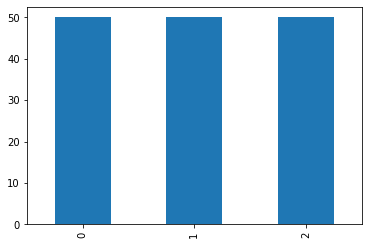

In [ ]:
iris_df["class"].value_counts().plot.bar()


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

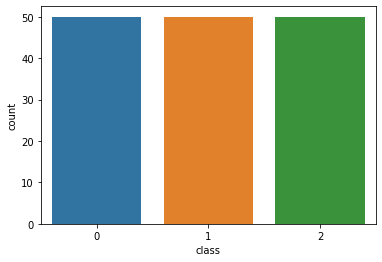

In [ ]:
import seaborn as sns
sns.countplot(iris_df["class"])

 **We could observe from the above analysis that this dataset is a balanced one**



In [ ]:
iris_df.isnull().sum()


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

In [ ]:
#split the data for feature and target
X = iris_df.drop("class", axis =1)
y = iris_df["class"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X, y, test_size = 0.25 , random_state = 24)

In [ ]:
print("Shape of the training features is ", X_train.shape)
print("Shape of the training target is ", y_train.shape)
print("Shape of the testing features is ", X_test.shape)
print("Shape of the testing target is ", y_test.shape)

Shape of the training features is  (112, 4)
Shape of the training target is  (112,)
Shape of the testing features is  (38, 4)
Shape of the testing target is  (38,)


In [ ]:
# Building the Naive bayes model
from sklearn.naive_bayes import GaussianNB


In [ ]:
gnb_model = GaussianNB()


In [ ]:
gnb_model.fit(X_train, y_train)
#y_test_pred = gnb_model.predict(X_test)


GaussianNB()

In [ ]:
# Apply for train data set
y_train_pred = gnb_model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
print("The train data accuracy of the GaussianNB model is ",accuracy_score(y_train,y_train_pred))

The train data accuracy of the GaussianNB model is  0.9642857142857143


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.95      0.95      0.95        42
           2       0.94      0.94      0.94        32

    accuracy                           0.96       112
   macro avg       0.96      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112



In [ ]:
#Apply for test data
y_test_pred = gnb_model.predict(X_test)
print("The train data accuracy of the GaussianNB model is ",accuracy_score(y_test,y_test_pred))

The train data accuracy of the GaussianNB model is  0.9473684210526315


In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.94      0.94      0.94        18

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_test_pred)
cm

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 17]], dtype=int64)

<AxesSubplot:>

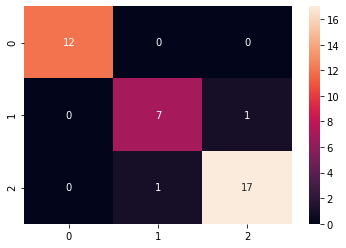

In [ ]:
sns.heatmap(cm,annot=True)

# End of Naive Bayes